In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-games/players.csv
/kaggle/input/nba-games/teams.csv
/kaggle/input/nba-games/ranking.csv
/kaggle/input/nba-games/games_details.csv
/kaggle/input/nba-games/games.csv


In [123]:
players = pd.read_csv("/kaggle/input/nba-games/players.csv")
teams = pd.read_csv("/kaggle/input/nba-games/teams.csv")
games = pd.read_csv("/kaggle/input/nba-games/games.csv")
details = pd.read_csv("/kaggle/input/nba-games/games_details.csv")
ranking = pd.read_csv("/kaggle/input/nba-games/ranking.csv")

In [124]:
players

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019
...,...,...,...,...
7223,Lanny Smith,1610612758,201831,2009
7224,Warren Carter,1610612752,201999,2009
7225,Bennet Davis,1610612751,201834,2009
7226,Brian Hamilton,1610612751,201646,2009


In [125]:
games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-03-21,22000645,Final,1610612748,1610612754,2020,1610612748,106.0,0.402,0.826,...,27.0,51.0,1610612754,109.0,0.388,0.900,0.333,27.0,50.0,0
1,2021-03-21,22000016,Final,1610612745,1610612760,2020,1610612745,112.0,0.494,0.741,...,22.0,38.0,1610612760,114.0,0.462,0.680,0.333,22.0,52.0,0
2,2021-03-21,22000646,Final,1610612743,1610612740,2020,1610612743,108.0,0.500,0.800,...,30.0,37.0,1610612740,113.0,0.482,0.767,0.286,26.0,45.0,0
3,2021-03-21,22000167,Final,1610612738,1610612753,2020,1610612738,112.0,0.455,1.000,...,27.0,45.0,1610612753,96.0,0.381,0.700,0.324,20.0,44.0,1
4,2021-03-21,22000647,Final,1610612751,1610612764,2020,1610612751,113.0,0.489,0.727,...,24.0,35.0,1610612764,106.0,0.532,0.789,0.333,24.0,43.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24190,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
24191,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
24192,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
24193,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [126]:
teams

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends
5,0,1610612743,1976,2019,DEN,Nuggets,1976,Denver,Pepsi Center,19099.0,Stan Kroenke,Tim Connelly,Michael Malone,No Affiliate
6,0,1610612745,1967,2019,HOU,Rockets,1967,Houston,Toyota Center,18104.0,Tilman Fertitta,Daryl Morey,Mike D'Antoni,Rio Grande Valley Vipers
7,0,1610612746,1970,2019,LAC,Clippers,1970,Los Angeles,Staples Center,19060.0,Steve Ballmer,Michael Winger,Doc Rivers,Agua Caliente Clippers of Ontario
8,0,1610612747,1948,2019,LAL,Lakers,1948,Los Angeles,Staples Center,19060.0,Jerry Buss Family Trust,Rob Pelinka,Frank Vogel,South Bay Lakers
9,0,1610612748,1988,2019,MIA,Heat,1988,Miami,AmericanAirlines Arena,19600.0,Micky Arison,Pat Riley,Erik Spoelstra,Sioux Falls Skyforce


In [127]:
ranking

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612762,0,22020,2021-03-21,West,Utah,41,30,11,0.732,16-2,14-9,NaN
1,1610612756,0,22020,2021-03-21,West,Phoenix,41,28,13,0.683,15-8,13-5,NaN
2,1610612747,0,22020,2021-03-21,West,L.A. Lakers,43,28,15,0.651,14-9,14-6,NaN
3,1610612746,0,22020,2021-03-21,West,LA Clippers,43,27,16,0.628,14-6,13-10,NaN
4,1610612743,0,22020,2021-03-21,West,Denver,42,25,17,0.595,12-9,13-8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191107,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
191108,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
191109,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
191110,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [128]:
details = details.drop_duplicates(subset=["GAME_ID", "PLAYER_NAME"])
details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22000645,1610612754,IND,Indiana,203200,Justin Holiday,F,NaN,41:45,5.0,...,0.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,15.0,8.0
1,22000645,1610612754,IND,Indiana,1627734,Domantas Sabonis,F,NaN,35:06,5.0,...,2.0,9.0,11.0,1.0,3.0,0.0,5.0,6.0,17.0,-2.0
2,22000645,1610612754,IND,Indiana,1626167,Myles Turner,C,NaN,29:58,4.0,...,1.0,5.0,6.0,1.0,0.0,5.0,2.0,3.0,16.0,6.0
3,22000645,1610612754,IND,Indiana,1627747,Caris LeVert,G,NaN,34:42,5.0,...,0.0,3.0,3.0,3.0,1.0,0.0,0.0,1.0,13.0,1.0
4,22000645,1610612754,IND,Indiana,1627763,Malcolm Brogdon,G,NaN,40:35,4.0,...,3.0,3.0,6.0,10.0,1.0,0.0,2.0,1.0,12.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602762,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
602763,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
602764,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
602765,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,19,1.0,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [129]:
bron = details[details["PLAYER_NAME"] == "LeBron James"]
bron

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
288,22000640,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,10:36,3.0,...,0.0,1.0,1.0,4.0,0.0,0.0,1.0,0.0,10.0,-5.0
841,22000630,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,36:30,14.0,...,1.0,7.0,8.0,6.0,1.0,1.0,3.0,2.0,37.0,7.0
1309,22000615,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,31:13,8.0,...,1.0,11.0,12.0,12.0,0.0,1.0,4.0,0.0,25.0,0.0
1515,22000608,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,30:29,8.0,...,1.0,9.0,10.0,11.0,0.0,0.0,6.0,3.0,22.0,33.0
2200,22000075,1610612747,LAL,Los Angeles,2544,LeBron James,F,NaN,35:41,8.0,...,1.0,10.0,11.0,10.0,2.0,0.0,4.0,0.0,26.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600600,11200095,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,29,2.0,...,0.0,4.0,4.0,8.0,2.0,1.0,2.0,2.0,10.0,NaN
601302,11200069,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,27,6.0,...,0.0,4.0,4.0,8.0,4.0,0.0,2.0,1.0,13.0,NaN
601918,11200043,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,20,5.0,...,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,11.0,NaN
602351,11200028,1610612748,MIA,Miami,2544,LeBron James,NaN,NaN,26,6.0,...,2.0,3.0,5.0,5.0,1.0,0.0,2.0,1.0,20.0,NaN


In [130]:
bron.drop(["TEAM_ID", "TEAM_CITY", "PLAYER_ID", "PLAYER_NAME", "COMMENT"], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [131]:
bron

,GAME_ID,TEAM_ABBREVIATION,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
288,22000640,LAL,F,10:36,3.0,6.0,0.500,1.0,2.0,0.500,...,0.0,1.0,1.0,4.0,0.0,0.0,1.0,0.0,10.0,-5.0
841,22000630,LAL,F,36:30,14.0,23.0,0.609,4.0,9.0,0.444,...,1.0,7.0,8.0,6.0,1.0,1.0,3.0,2.0,37.0,7.0
1309,22000615,LAL,F,31:13,8.0,14.0,0.571,4.0,7.0,0.571,...,1.0,11.0,12.0,12.0,0.0,1.0,4.0,0.0,25.0,0.0
1515,22000608,LAL,F,30:29,8.0,13.0,0.615,2.0,4.0,0.500,...,1.0,9.0,10.0,11.0,0.0,0.0,6.0,3.0,22.0,33.0
2200,22000075,LAL,F,35:41,8.0,22.0,0.364,3.0,7.0,0.429,...,1.0,10.0,11.0,10.0,2.0,0.0,4.0,0.0,26.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600600,11200095,MIA,NaN,29,2.0,8.0,0.250,1.0,4.0,0.250,...,0.0,4.0,4.0,8.0,2.0,1.0,2.0,2.0,10.0,NaN
601302,11200069,MIA,NaN,27,6.0,11.0,0.545,0.0,1.0,0.000,...,0.0,4.0,4.0,8.0,4.0,0.0,2.0,1.0,13.0,NaN
601918,11200043,MIA,NaN,20,5.0,8.0,0.625,0.0,1.0,0.000,...,0.0,3.0,3.0,4.0,3.0,0.0,0.0,0.0,11.0,NaN
602351,11200028,MIA,NaN,26,6.0,11.0,0.545,0.0,0.0,0.000,...,2.0,3.0,5.0,5.0,1.0,0.0,2.0,1.0,20.0,NaN


In [132]:
games_date = games[["GAME_DATE_EST", "GAME_ID", "SEASON"]]
games_date

,GAME_DATE_EST,GAME_ID,SEASON
0,2021-03-21,22000645,2020
1,2021-03-21,22000016,2020
2,2021-03-21,22000646,2020
3,2021-03-21,22000167,2020
4,2021-03-21,22000647,2020
...,...,...,...
24190,2014-10-06,11400007,2014
24191,2014-10-06,11400004,2014
24192,2014-10-06,11400005,2014
24193,2014-10-05,11400002,2014


In [133]:
stats = bron.merge(games_date, on="GAME_ID", how="left")

In [134]:
seasonal_stats = stats.groupby("SEASON").sum()/stats.groupby("SEASON").count()

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
seasonal_stats.iloc[0].FGM/seasonal_stats.iloc[0].FGA / seasonal_stats.iloc[0].FG_PCT

1.0266015928857435

In [137]:
seasonal_stats.columns

Index(['AST', 'BLK', 'DREB', 'FG3A', 'FG3M', 'FG3_PCT', 'FGA', 'FGM', 'FG_PCT',
       'FTA', 'FTM', 'FT_PCT', 'GAME_DATE_EST', 'GAME_ID', 'MIN', 'OREB', 'PF',
       'PLUS_MINUS', 'PTS', 'REB', 'START_POSITION', 'STL',
       'TEAM_ABBREVIATION', 'TO'],
      dtype='object')

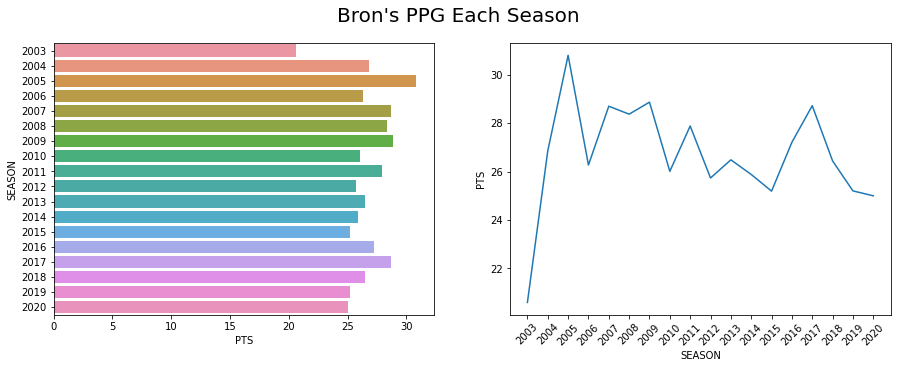

In [138]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's PPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["PTS"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["PTS"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

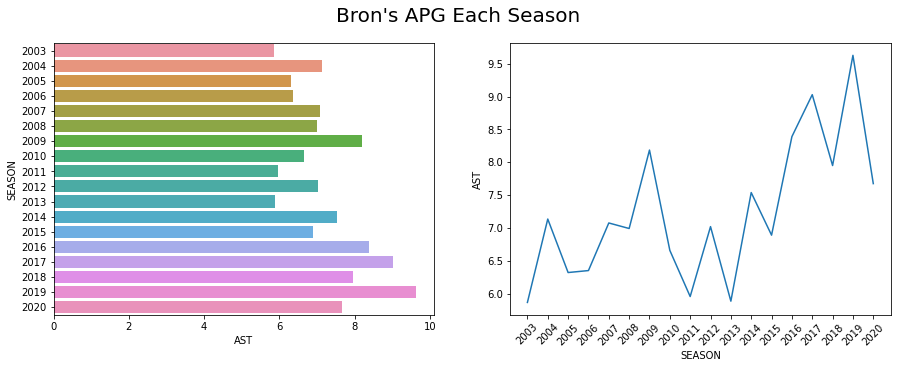

In [139]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's APG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["AST"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["AST"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

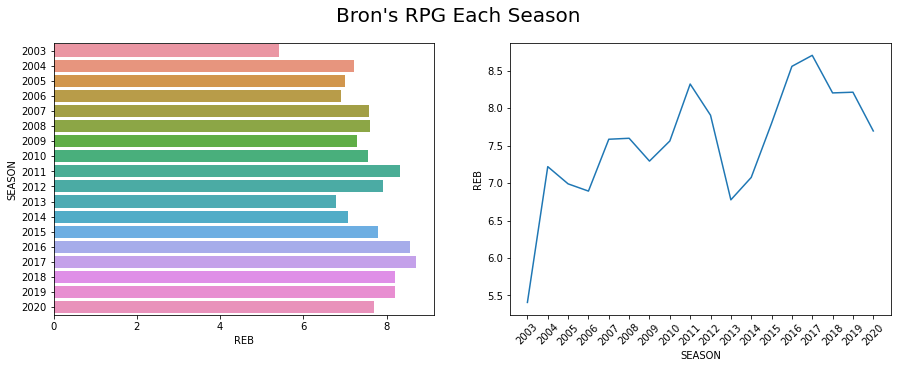

In [140]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's RPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["REB"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["REB"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

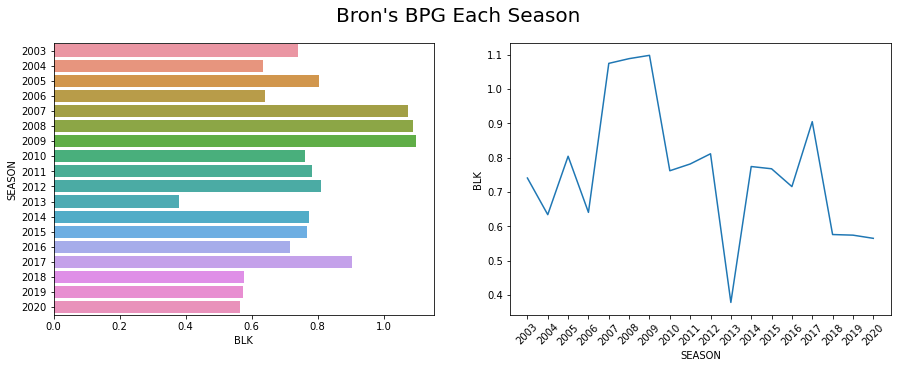

In [141]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's BPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["BLK"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["BLK"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

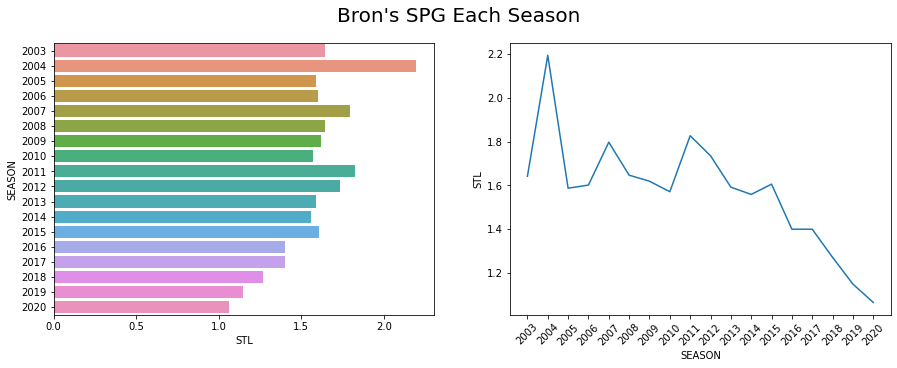

In [142]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's SPG Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["STL"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["STL"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

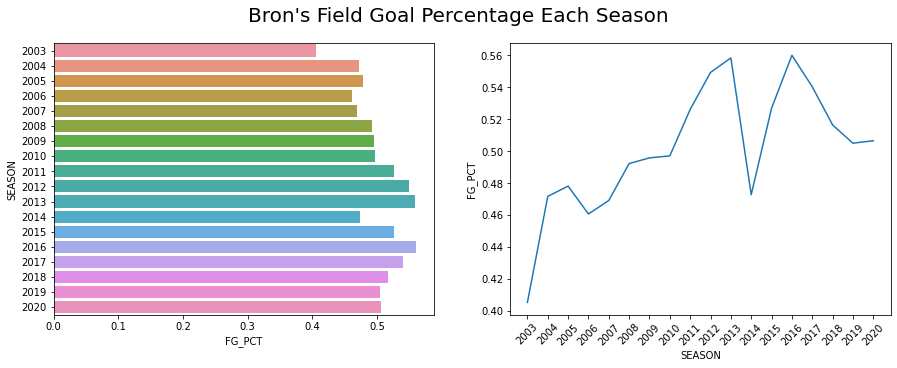

In [143]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's Field Goal Percentage Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["FG_PCT"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG_PCT"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

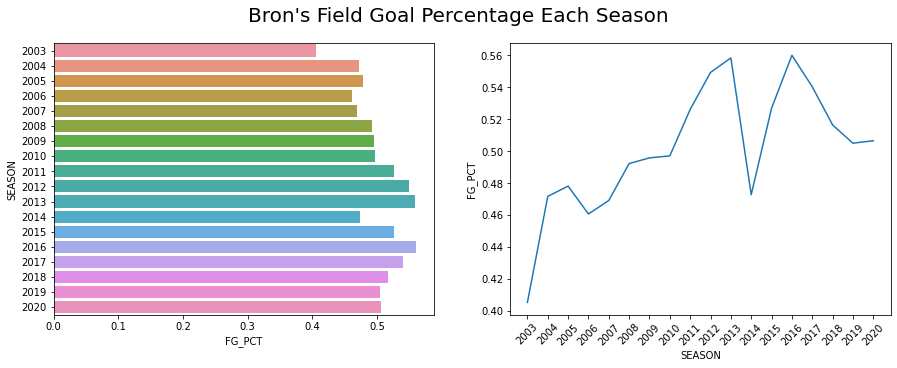

In [144]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's Field Goal Percentage Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["FG_PCT"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["FG_PCT"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

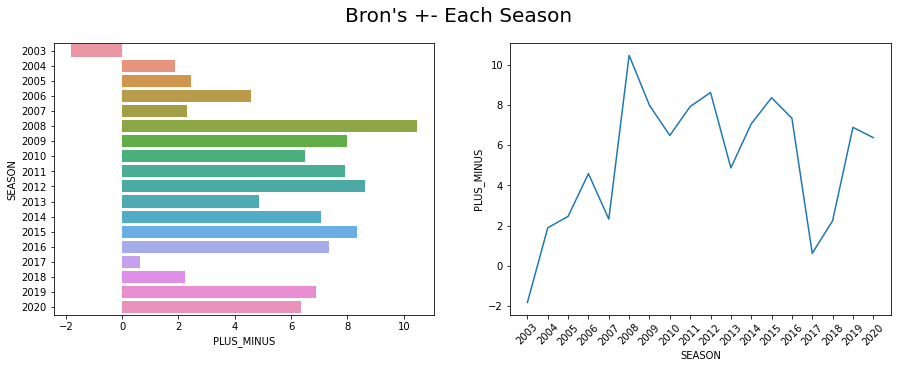

In [145]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Bron's +- Each Season", fontsize=20)
sns.barplot(x=seasonal_stats["PLUS_MINUS"], y = seasonal_stats.index.map(str), ax=axes[0])
sns.lineplot(y=seasonal_stats["PLUS_MINUS"], x = seasonal_stats.index.map(str), ax=axes[1])
axes[1].tick_params(axis='x', labelrotation=45)

In [146]:
team_stats = stats.groupby("TEAM_ABBREVIATION").sum()/stats.groupby("TEAM_ABBREVIATION").count()

In [147]:
team_stats

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,MIN,OREB,PF,PLUS_MINUS,PTS,REB,SEASON,START_POSITION,STL,TO
TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
CLE,7.273250,0.843720,6.183126,4.365292,1.461170,0.292588,19.983701,9.794823,0.490333,8.328859,...,NaN,1.232023,1.967402,4.766568,27.146692,7.415149,2009.745336,NaN,1.631831,3.523490
LAL,8.678392,0.572864,7.170854,5.924623,2.100503,0.331930,18.643216,9.502513,0.508814,6.376884,...,NaN,0.919598,1.668342,5.386935,25.522613,8.090452,2018.936893,NaN,1.165829,3.698492
MIA,6.401496,0.680798,6.364090,3.421446,1.244389,0.303187,18.117207,9.650873,0.532970,7.795511,...,NaN,1.251870,1.770574,6.944882,26.466334,7.615960,2011.509709,NaN,1.675810,3.264339


In [148]:
details.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [149]:
all_players = details[["PLAYER_NAME", "PTS", "AST", "REB", "BLK", "STL", "PF", "MIN", "FGM", "FGA", "FG3M", "FG3A", "FTM", "FTA"]]
all_players = all_players.groupby("PLAYER_NAME").sum()
all_players

,PTS,AST,REB,BLK,STL,PF,FGM,FGA,FG3M,FG3A,FTM,FTA
PLAYER_NAME,,,,,,,,,,,,
A.J. Guyton,4.0,1.0,2.0,0.0,1.0,2.0,0.0,4.0,0.0,2.0,4.0,4.0
AJ Hammons,82.0,7.0,60.0,16.0,1.0,34.0,34.0,76.0,5.0,12.0,9.0,20.0
AJ Price,1832.0,647.0,435.0,9.0,143.0,289.0,655.0,1686.0,267.0,805.0,255.0,343.0
Aaron Brooks,7141.0,2157.0,1235.0,100.0,400.0,1397.0,2573.0,6230.0,920.0,2514.0,1075.0,1288.0
Aaron Craft,12.0,6.0,10.0,0.0,4.0,7.0,5.0,10.0,2.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zion Williamson,1718.0,199.0,475.0,38.0,58.0,149.0,660.0,1082.0,14.0,41.0,384.0,561.0
Zoran Dragic,28.0,5.0,9.0,0.0,2.0,6.0,11.0,33.0,3.0,15.0,3.0,5.0
Zoran Planinic,651.0,189.0,223.0,7.0,68.0,264.0,225.0,553.0,40.0,144.0,161.0,240.0


In [150]:
all_players[all_players.index == "LeBron James"]

,PTS,AST,REB,BLK,STL,PF,FGM,FGA,FG3M,FG3A,FTM,FTA
PLAYER_NAME,,,,,,,,,,,,
LeBron James,43929.0,11856.0,12377.0,1265.0,2602.0,3091.0,15947.0,31757.0,2434.0,7086.0,9601.0,13068.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

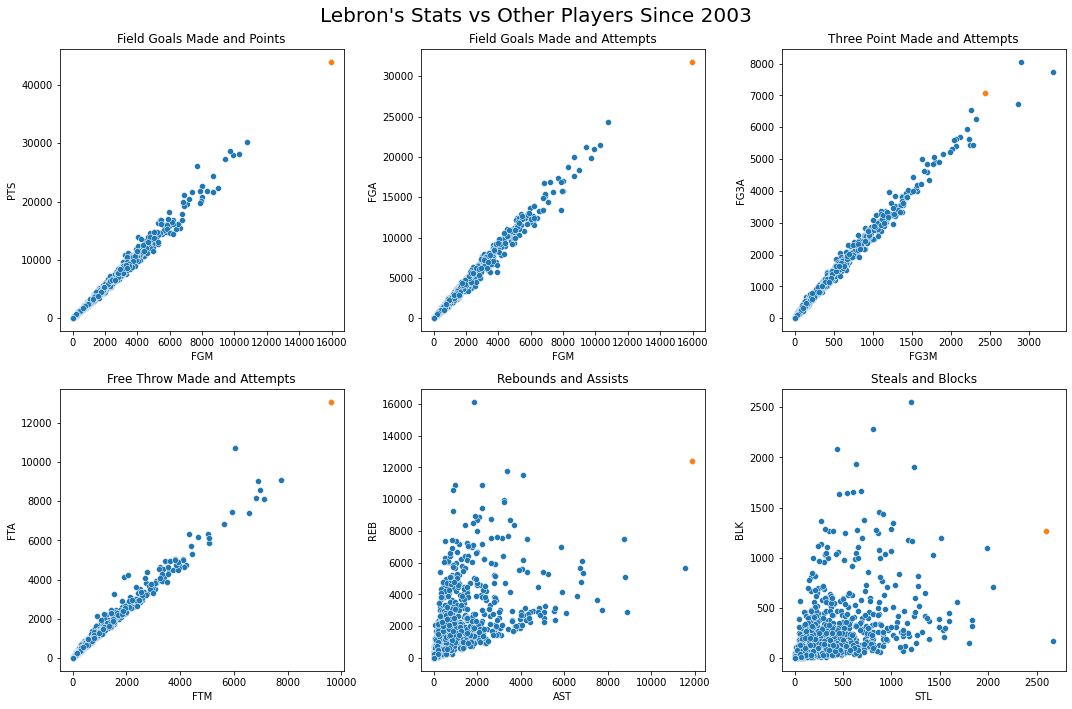

In [180]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
fig.suptitle("Lebron's Stats vs Other Players Since 2003", fontsize=20)

sns.scatterplot(all_players["FGM"], all_players["PTS"], ax = axes[0][0])
sns.scatterplot(x="FGM", y="PTS", data=all_players[all_players.index == "LeBron James"], ax = axes[0][0])
axes[0][0].title.set_text('Field Goals Made and Points')

sns.scatterplot(all_players["FGM"], all_players["FGA"], ax = axes[0][1])
sns.scatterplot(x="FGM", y="FGA", data=all_players[all_players.index == "LeBron James"], ax = axes[0][1])
axes[0][1].title.set_text('Field Goals Made and Attempts')

sns.scatterplot(all_players["FG3M"], all_players["FG3A"], ax = axes[0][2])
sns.scatterplot(x="FG3M", y="FG3A", data=all_players[all_players.index == "LeBron James"], ax = axes[0][2])
axes[0][2].title.set_text('Three Point Made and Attempts')

sns.scatterplot(all_players["FTM"], all_players["FTA"], ax = axes[1][0])
sns.scatterplot(x="FTM", y="FTA", data=all_players[all_players.index == "LeBron James"], ax = axes[1][0])
axes[1][0].title.set_text('Free Throw Made and Attempts')

sns.scatterplot(all_players["AST"], all_players["REB"], ax = axes[1][1])
sns.scatterplot(x="AST", y="REB", data=all_players[all_players.index == "LeBron James"], ax = axes[1][1] )
axes[1][1].title.set_text('Rebounds and Assists')

sns.scatterplot(all_players["STL"], all_players["BLK"], ax = axes[1][2])
sns.scatterplot(x="STL", y="BLK", data=all_players[all_players.index == "LeBron James"], ax = axes[1][2])
axes[1][2].title.set_text('Steals and Blocks')

fig.tight_layout()